# **Machine Learning (Classificação) - Aprovação de Empréstimos**

### Dados da coluna:

 Este conjunto de dados fornece informações sobre as características dos requerentes de empréstimos e a sua avaliação de risco. Ele inclui informações sobre vários atributos dos solicitantes de empréstimo, incluindo detalhes demográficos, status financeiro, histórico de emprego e status de propriedade. O conjunto de dados inclui características numéricas e categóricas, tornando-o adequado para diversas abordagens analíticas.

 Principais características:

Id: Identificador exclusivo para cada solicitante de empréstimo.

Rendimento: O nível de rendimento do requerente.

Idade: Idade do candidato.

Experiência: Anos de experiência profissional.

Casado/Solteiro: Estado civil do requerente.

House_Ownership: Indica se o requerente possui ou aluga uma casa.

Car_Ownership: Indica se o requerente é proprietário de um carro.

Profissão: Ocupação ou profissão do candidato.

CIDADE: Cidade de residência do requerente.

ESTADO: Estado de residência do requerente.

CURRENT_JOB_YRS: Duração do emprego no emprego atual.

CURRENT_HOUSE_YRS: Duração da residência na casa atual.

Risk_Flag: Indicador binário de risco de empréstimo, onde 1 representa um candidato de risco sinalizado e 0 representa um candidato não arriscado.

## **Importando as Bibliotecas e Carregando o Dataset**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


# ignorando avisos
warnings.filterwarnings('ignore')

# Estilo Dark nos gráficos do Matplotlib e Seaborn
plt.style.use('dark_background')

# Carregando os dados 
df = pd.read_json('/Users/diogomonteiro/loan_approval_dataset 3.json')

# Análisando os 5 primeiros dados
df.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [43]:
# Analisando o tamanho dos dados, xxxxx linhas, xx colunas
df.shape

(252000, 13)

### **Análise Exploratória das Variáveis Categóricas e Numéricas'**

Nesta análise temos 2 objetivos:

1 - Conhecer as variáveis alvo (Risk_Flag) está relacionado com as outras variáveis.

2 - Iremos avaliar as variáveis categóricas para conhecimento dos dados e descartar variáveis que não fazem sentido.

3 - Conhecer as variáveis numéricas.

4 - Realizar uma análise estatística nas variáveis para o futuros tratamentos. Iremos avaliar média, mediana, moda, desvio padrão correlações, outliers, distruição dos dados, etc...


In [45]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [47]:
df2=df
df2['Risk_Flag'] = df['Risk_Flag'].astype(str)
df2.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag            object
dtype: object

__________________________________________
Id

------------------------------------------
Tipo da coluna: int64
------------------------------------------
Analisando os dados nulos: 0
------------------------------------------
Analisando os quartis:
count    252000.000000
mean     126000.500000
std       72746.278255
min           1.000000
25%       63000.750000
50%      126000.500000
75%      189000.250000
max      252000.000000
Name: Id, dtype: float64
------------------------------------------


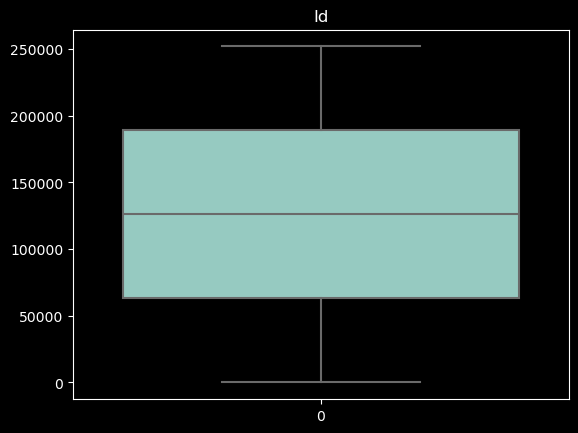

__________________________________________


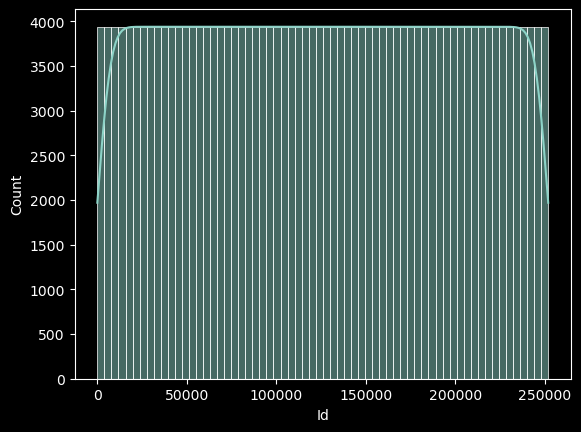

__________________________________________
__________________________________________
Income

------------------------------------------
Tipo da coluna: int64
------------------------------------------
Analisando os dados nulos: 0
------------------------------------------
Analisando os quartis:
count    2.520000e+05
mean     4.997117e+06
std      2.878311e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000694e+06
75%      7.477502e+06
max      9.999938e+06
Name: Income, dtype: float64
------------------------------------------


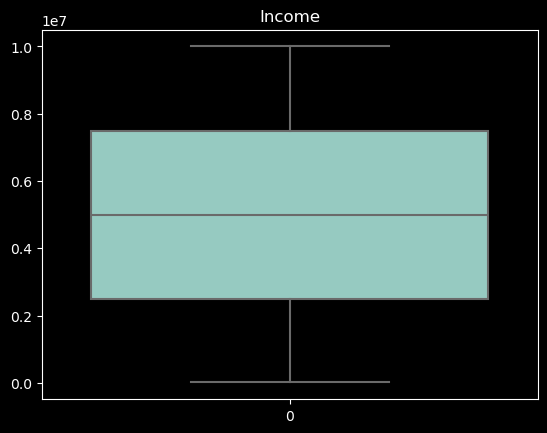

__________________________________________


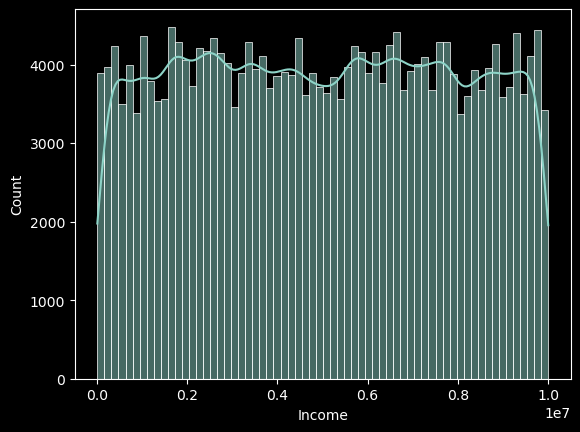

__________________________________________
__________________________________________
Age

------------------------------------------
Tipo da coluna: int64
------------------------------------------
Analisando os dados nulos: 0
------------------------------------------
Analisando os quartis:
count    252000.000000
mean         49.954071
std          17.063855
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: Age, dtype: float64
------------------------------------------


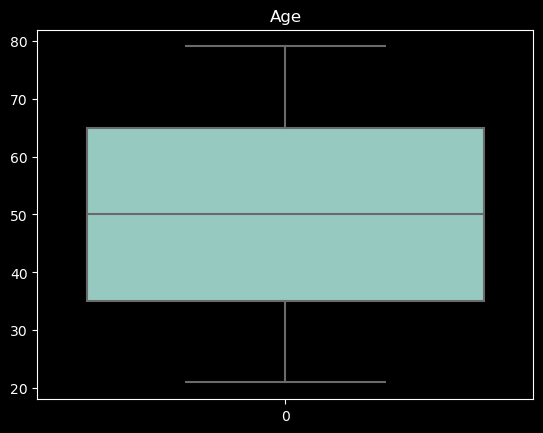

__________________________________________


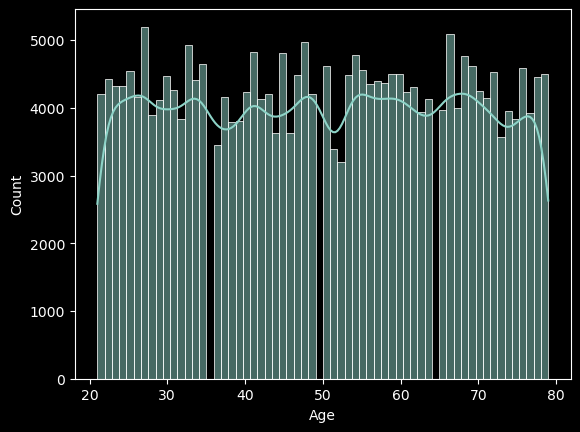

__________________________________________
__________________________________________
Experience

------------------------------------------
Tipo da coluna: int64
------------------------------------------
Analisando os dados nulos: 0
------------------------------------------
Analisando os quartis:
count    252000.000000
mean         10.084437
std           6.002590
min           0.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: Experience, dtype: float64
------------------------------------------


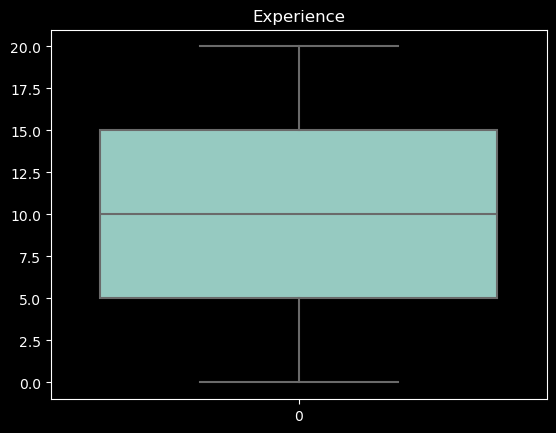

__________________________________________


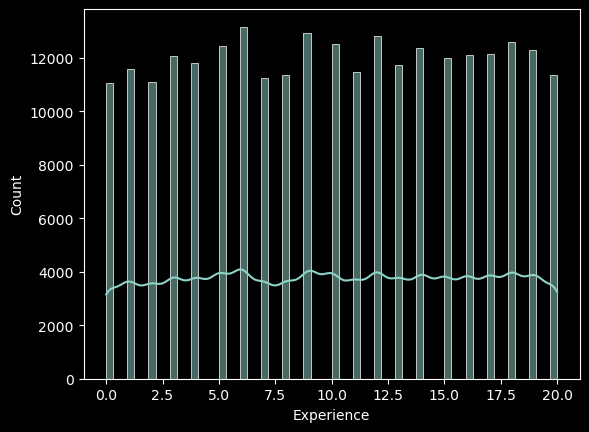

__________________________________________
__________________________________________

 Nome da coluna: Married/Single

------------------------------------------

 Tipo da coluna: object

------------------------------------------

 Analisando os dados nulos: 0

------------------------------------------


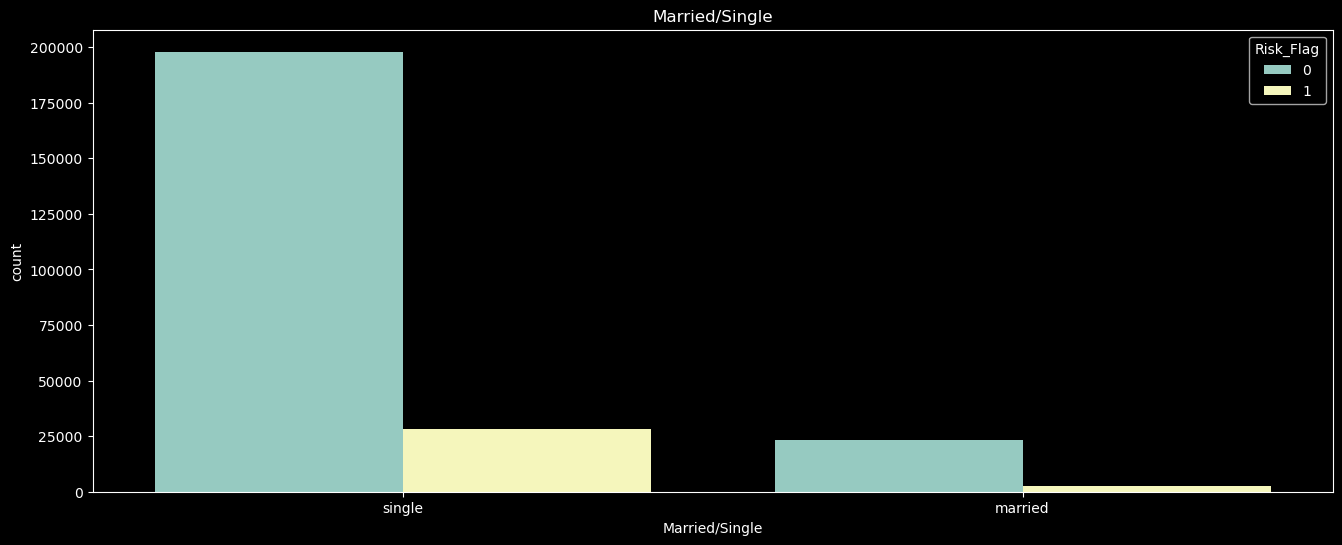

__________________________________________
__________________________________________

 Nome da coluna: House_Ownership

------------------------------------------

 Tipo da coluna: object

------------------------------------------

 Analisando os dados nulos: 0

------------------------------------------


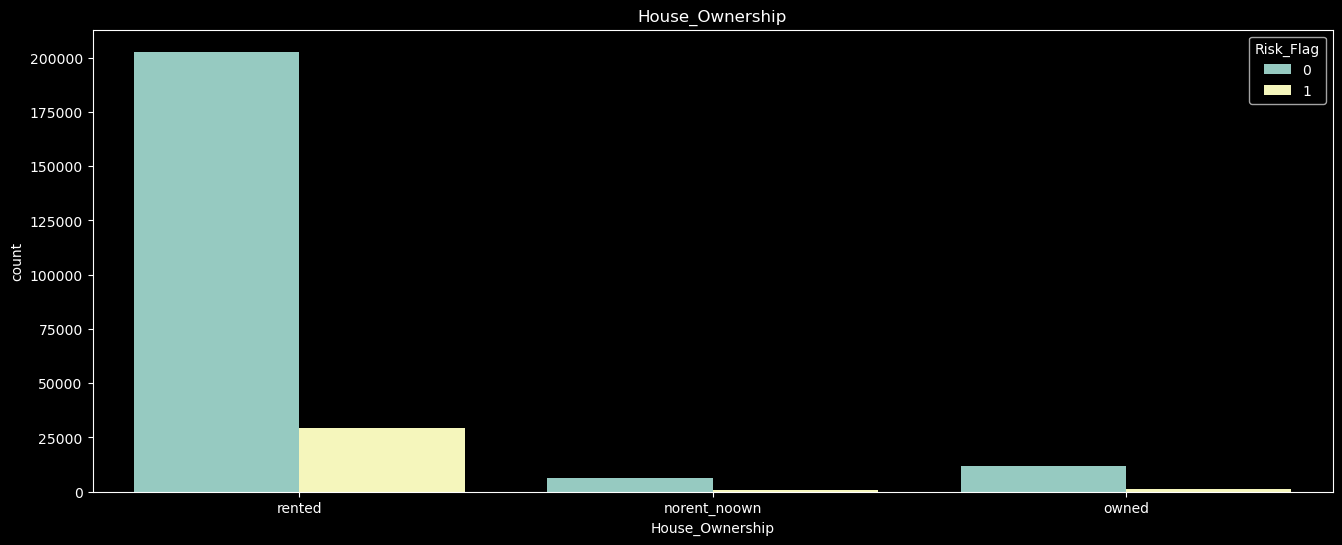

__________________________________________
__________________________________________

 Nome da coluna: Car_Ownership

------------------------------------------

 Tipo da coluna: object

------------------------------------------

 Analisando os dados nulos: 0

------------------------------------------


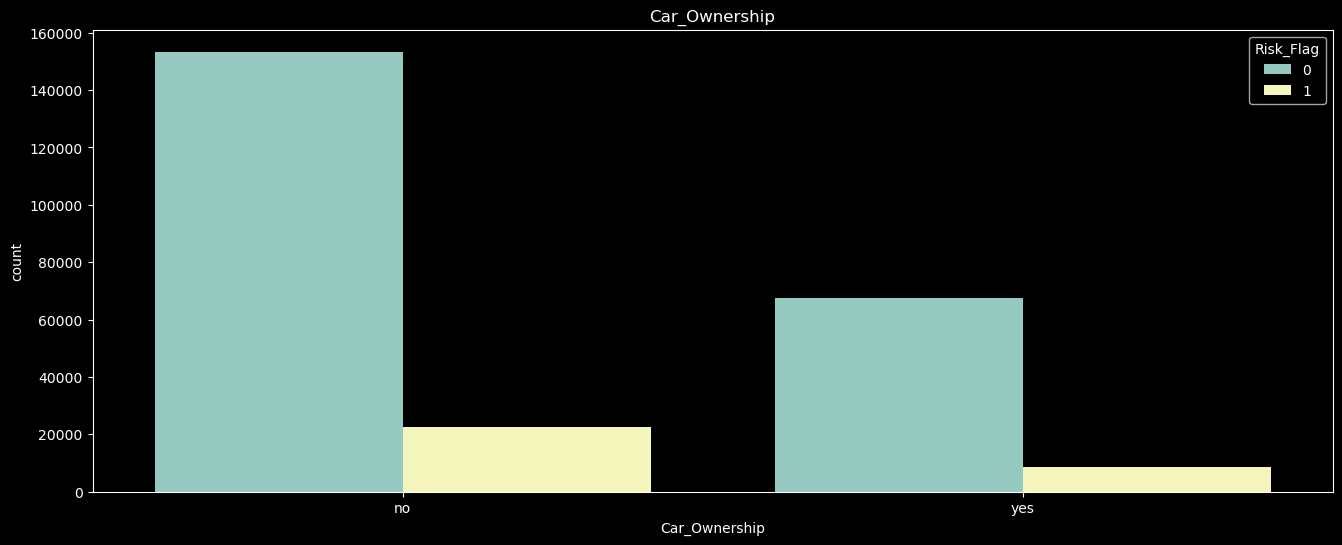

__________________________________________
__________________________________________

 Nome da coluna: Profession

------------------------------------------

 Tipo da coluna: object

------------------------------------------

 Analisando os dados nulos: 0

------------------------------------------


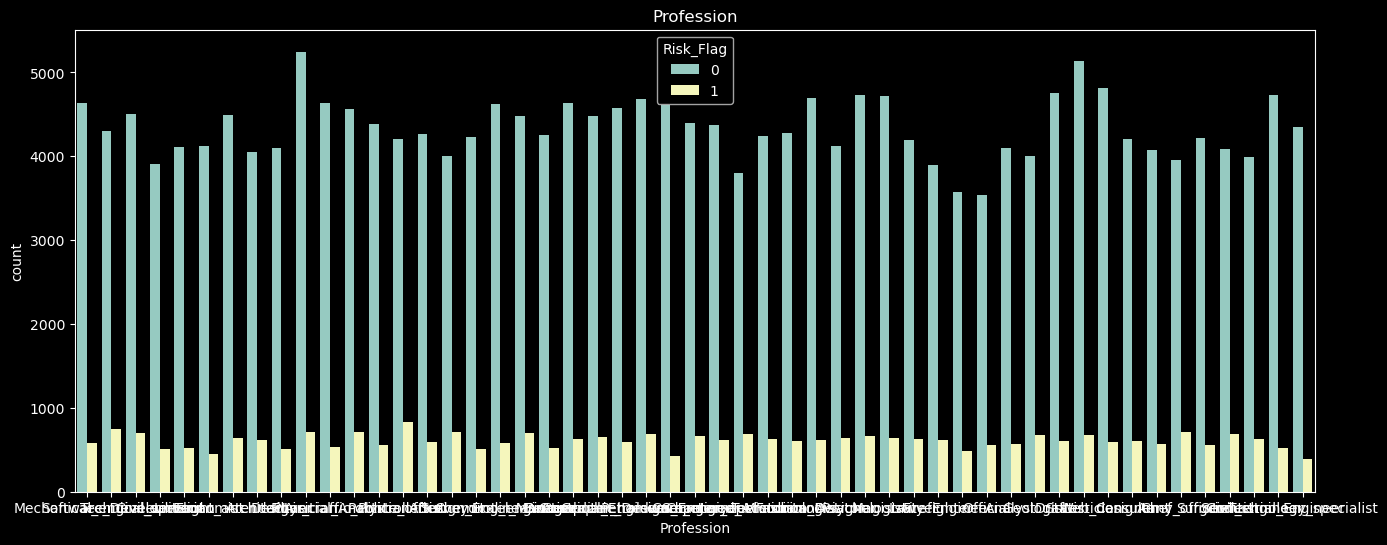

__________________________________________
__________________________________________

 Nome da coluna: CITY

------------------------------------------

 Tipo da coluna: object

------------------------------------------

 Analisando os dados nulos: 0

------------------------------------------


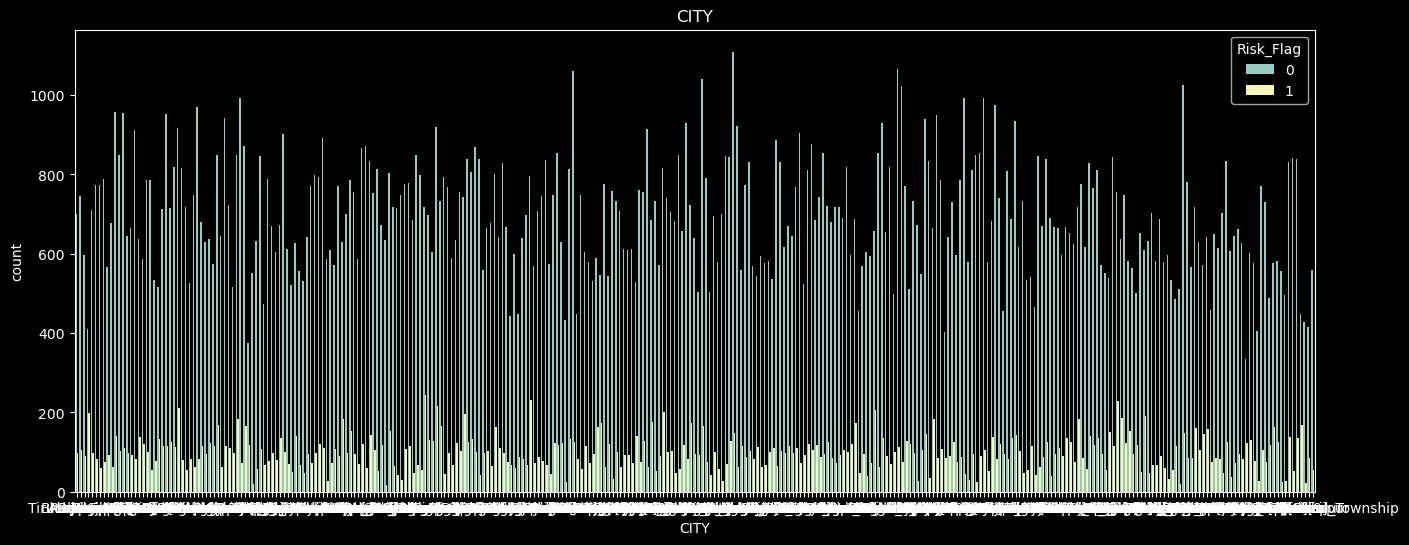

__________________________________________
__________________________________________

 Nome da coluna: STATE

------------------------------------------

 Tipo da coluna: object

------------------------------------------

 Analisando os dados nulos: 0

------------------------------------------


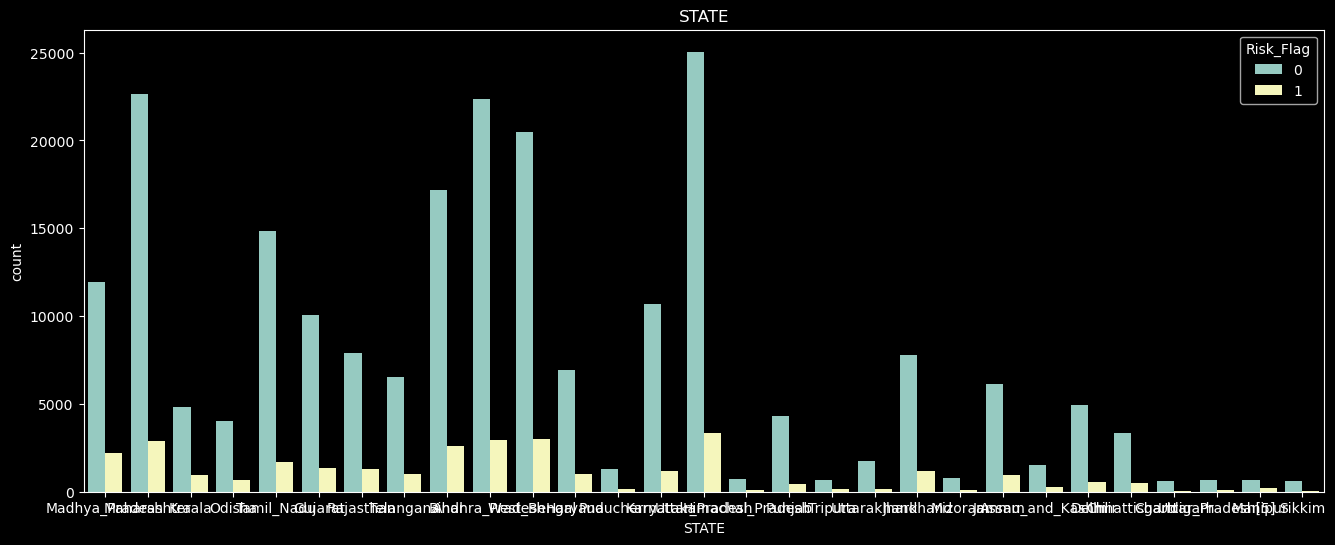

__________________________________________
__________________________________________
CURRENT_JOB_YRS

------------------------------------------
Tipo da coluna: int64
------------------------------------------
Analisando os dados nulos: 0
------------------------------------------
Analisando os quartis:
count    252000.000000
mean          6.333877
std           3.647053
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          14.000000
Name: CURRENT_JOB_YRS, dtype: float64
------------------------------------------


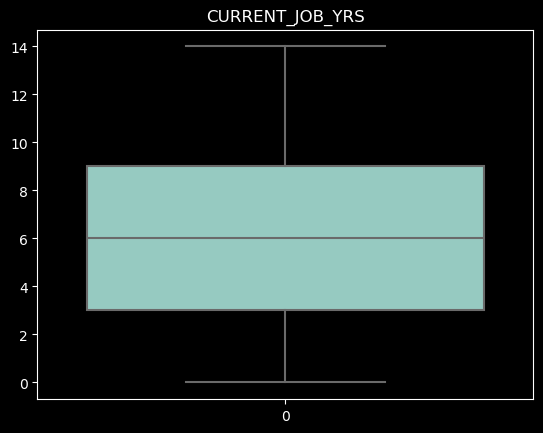

__________________________________________


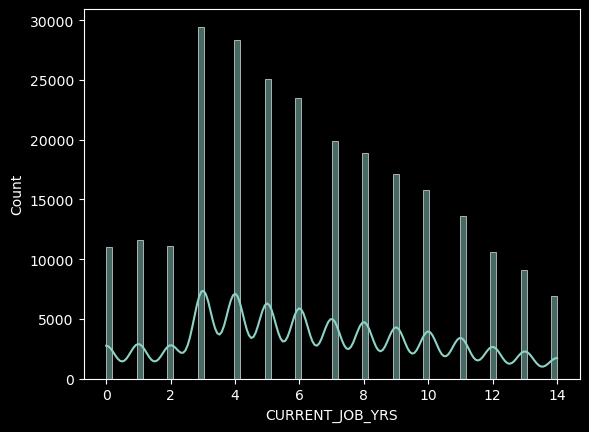

__________________________________________
__________________________________________
CURRENT_HOUSE_YRS

------------------------------------------
Tipo da coluna: int64
------------------------------------------
Analisando os dados nulos: 0
------------------------------------------
Analisando os quartis:
count    252000.000000
mean         11.997794
std           1.399037
min          10.000000
25%          11.000000
50%          12.000000
75%          13.000000
max          14.000000
Name: CURRENT_HOUSE_YRS, dtype: float64
------------------------------------------


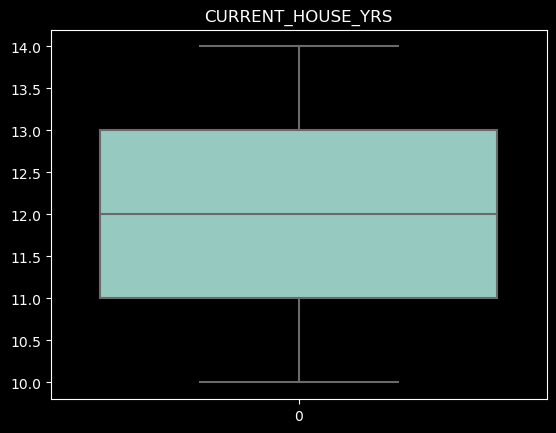

__________________________________________


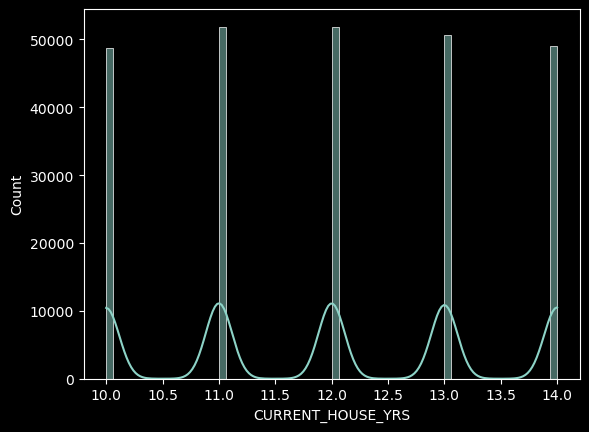

__________________________________________
__________________________________________

 Nome da coluna: Risk_Flag

------------------------------------------

 Tipo da coluna: object

------------------------------------------

 Analisando os dados nulos: 0

------------------------------------------


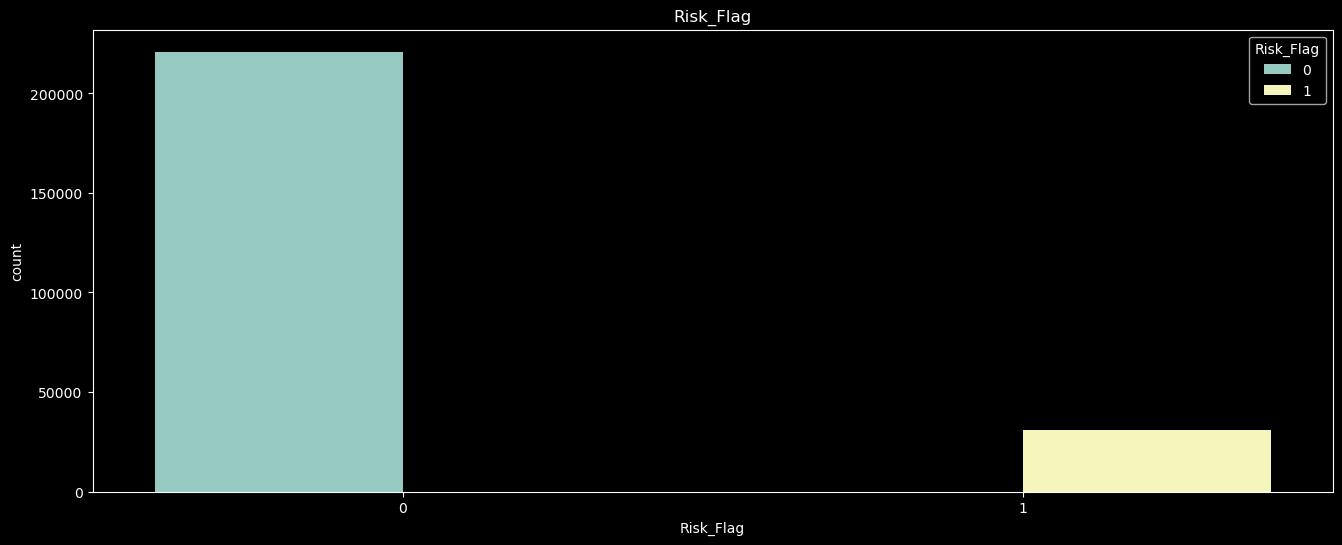

__________________________________________


In [48]:
def analise(dados):
    for i in dados.columns:
        if dados[i].dtypes == 'object':
            print('__________________________________________')
            print(f'\n Nome da coluna: {dados[i].name}\n')
            print('------------------------------------------')
            print(f'\n Tipo da coluna: {dados[i].dtypes}\n')
            print('------------------------------------------')
            print(f'\n Analisando os dados nulos: {dados[i].isnull().sum()}\n')
            print('------------------------------------------')
            plt.figure(figsize=(16,6))
            plt.title(dados[i].name)
            sns.countplot(data = dados, x = dados[i], hue = 'Risk_Flag')
            plt.show();
            print('__________________________________________')

        else:
            
            print('__________________________________________')
            print(f'{dados[i].name}\n')
            print('------------------------------------------')
            print(f'Tipo da coluna: {dados[i].dtypes}')
            print('------------------------------------------')
            print(f'Analisando os dados nulos: {dados[i].isnull().sum()}')
            print('------------------------------------------')
            print(f'Analisando os quartis:\n{dados[i].describe()}')
            print('------------------------------------------')
            plt.title(dados[i].name)
            sns.boxplot(data = dados[i])
            plt.show();
            print('__________________________________________')
            sns.histplot(dados[i], kde = 'Risk_Flag')
            plt.show();
            print('__________________________________________')
            
analise(df)

In [49]:
df.groupby(['Profession']).size()

Profession
Air_traffic_controller        5281
Analyst                       4668
Architect                     4657
Army_officer                  4661
Artist                        4861
Aviator                       4758
Biomedical_Engineer           5127
Chartered_Accountant          4493
Chef                          4635
Chemical_engineer             5205
Civil_engineer                4616
Civil_servant                 4413
Comedian                      5259
Computer_hardware_engineer    5372
Computer_operator             4990
Consultant                    4808
Dentist                       4782
Design_Engineer               4729
Designer                      4598
Drafter                       5359
Economist                     4573
Engineer                      4048
Fashion_Designer              5304
Financial_Analyst             5167
Firefighter                   4507
Flight_attendant              5128
Geologist                     4672
Graphic_Designer              5166
Hotel_Man

In [50]:
df.groupby(['CITY']).size()

CITY
Adoni                953
Agartala             809
Agra                1012
Ahmedabad            649
Ahmednagar           645
                    ... 
Vijayanagaram       1259
Vijayawada          1172
Visakhapatnam[4]     971
Warangal[11][12]     459
Yamunanagar          659
Length: 317, dtype: int64

In [51]:
df.groupby(['STATE']).size()

STATE
Andhra_Pradesh       25297
Assam                 7062
Bihar                19780
Chandigarh             656
Chhattisgarh          3834
Delhi                 5490
Gujarat              11408
Haryana               7890
Himachal_Pradesh       833
Jammu_and_Kashmir     1780
Jharkhand             8965
Karnataka            11855
Kerala                5805
Madhya_Pradesh       14122
Maharashtra          25562
Manipur                849
Mizoram                849
Odisha                4658
Puducherry            1433
Punjab                4720
Rajasthan             9174
Sikkim                 608
Tamil_Nadu           16537
Telangana             7524
Tripura                809
Uttar_Pradesh        28400
Uttar_Pradesh[5]       743
Uttarakhand           1874
West_Bengal          23483
dtype: int64

In [52]:
df1= df.drop(['Id','Profession', 'STATE','CITY'],axis=1)

In [53]:
df1.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [54]:
'''df1 = pd.get_dummies(df,columns=['House_Ownership', 'Profession', 'STATE'])
df1[['House_Ownership_norent_noown', 'House_Ownership_owned',
       'House_Ownership_rented', 'Profession_Air_traffic_controller',
       'Profession_Analyst', 'Profession_Architect', 'Profession_Army_officer',
       'Profession_Artist', 'Profession_Aviator',
       'Profession_Biomedical_Engineer', 'Profession_Chartered_Accountant',
       'Profession_Chef', 'Profession_Chemical_engineer',
       'Profession_Civil_engineer', 'Profession_Civil_servant',
       'Profession_Comedian', 'Profession_Computer_hardware_engineer',
       'Profession_Computer_operator', 'Profession_Consultant',
       'Profession_Dentist', 'Profession_Design_Engineer',
       'Profession_Designer', 'Profession_Drafter', 'Profession_Economist',
       'Profession_Engineer', 'Profession_Fashion_Designer',
       'Profession_Financial_Analyst', 'Profession_Firefighter',
       'Profession_Flight_attendant', 'Profession_Geologist',
       'Profession_Graphic_Designer', 'Profession_Hotel_Manager',
       'Profession_Industrial_Engineer', 'Profession_Lawyer',
       'Profession_Librarian', 'Profession_Magistrate',
       'Profession_Mechanical_engineer', 'Profession_Microbiologist',
       'Profession_Official', 'Profession_Petroleum_Engineer',
       'Profession_Physician', 'Profession_Police_officer',
       'Profession_Politician', 'Profession_Psychologist',
       'Profession_Scientist', 'Profession_Secretary',
       'Profession_Software_Developer', 'Profession_Statistician',
       'Profession_Surgeon', 'Profession_Surveyor',
       'Profession_Technical_writer', 'Profession_Technician',
       'Profession_Technology_specialist', 'Profession_Web_designer',
       'STATE_Andhra_Pradesh', 'STATE_Assam', 'STATE_Bihar',
       'STATE_Chandigarh', 'STATE_Chhattisgarh', 'STATE_Delhi',
       'STATE_Gujarat', 'STATE_Haryana', 'STATE_Himachal_Pradesh',
       'STATE_Jammu_and_Kashmir', 'STATE_Jharkhand', 'STATE_Karnataka',
       'STATE_Kerala', 'STATE_Madhya_Pradesh', 'STATE_Maharashtra',
       'STATE_Manipur', 'STATE_Mizoram', 'STATE_Odisha', 'STATE_Puducherry',
       'STATE_Punjab', 'STATE_Rajasthan', 'STATE_Sikkim', 'STATE_Tamil_Nadu',
       'STATE_Telangana', 'STATE_Tripura', 'STATE_Uttar_Pradesh',
       'STATE_Uttar_Pradesh[5]', 'STATE_Uttarakhand', 'STATE_West_Bengal']] = df1[['House_Ownership_norent_noown', 'House_Ownership_owned',
       'House_Ownership_rented', 'Profession_Air_traffic_controller',
       'Profession_Analyst', 'Profession_Architect', 'Profession_Army_officer',
       'Profession_Artist', 'Profession_Aviator',
       'Profession_Biomedical_Engineer', 'Profession_Chartered_Accountant',
       'Profession_Chef', 'Profession_Chemical_engineer',
       'Profession_Civil_engineer', 'Profession_Civil_servant',
       'Profession_Comedian', 'Profession_Computer_hardware_engineer',
       'Profession_Computer_operator', 'Profession_Consultant',
       'Profession_Dentist', 'Profession_Design_Engineer',
       'Profession_Designer', 'Profession_Drafter', 'Profession_Economist',
       'Profession_Engineer', 'Profession_Fashion_Designer',
       'Profession_Financial_Analyst', 'Profession_Firefighter',
       'Profession_Flight_attendant', 'Profession_Geologist',
       'Profession_Graphic_Designer', 'Profession_Hotel_Manager',
       'Profession_Industrial_Engineer', 'Profession_Lawyer',
       'Profession_Librarian', 'Profession_Magistrate',
       'Profession_Mechanical_engineer', 'Profession_Microbiologist',
       'Profession_Official', 'Profession_Petroleum_Engineer',
       'Profession_Physician', 'Profession_Police_officer',
       'Profession_Politician', 'Profession_Psychologist',
       'Profession_Scientist', 'Profession_Secretary',
       'Profession_Software_Developer', 'Profession_Statistician',
       'Profession_Surgeon', 'Profession_Surveyor',
       'Profession_Technical_writer', 'Profession_Technician',
       'Profession_Technology_specialist', 'Profession_Web_designer',
       'STATE_Andhra_Pradesh', 'STATE_Assam', 'STATE_Bihar',
       'STATE_Chandigarh', 'STATE_Chhattisgarh', 'STATE_Delhi',
       'STATE_Gujarat', 'STATE_Haryana', 'STATE_Himachal_Pradesh',
       'STATE_Jammu_and_Kashmir', 'STATE_Jharkhand', 'STATE_Karnataka',
       'STATE_Kerala', 'STATE_Madhya_Pradesh', 'STATE_Maharashtra',
       'STATE_Manipur', 'STATE_Mizoram', 'STATE_Odisha', 'STATE_Puducherry',
       'STATE_Punjab', 'STATE_Rajasthan', 'STATE_Sikkim', 'STATE_Tamil_Nadu',
       'STATE_Telangana', 'STATE_Tripura', 'STATE_Uttar_Pradesh',
       'STATE_Uttar_Pradesh[5]', 'STATE_Uttarakhand', 'STATE_West_Bengal']].astype('int64')'''
df1 = pd.get_dummies(df,columns=['House_Ownership'])
df1[['House_Ownership_norent_noown', 'House_Ownership_owned',
       'House_Ownership_rented']] = df1[['House_Ownership_norent_noown', 'House_Ownership_owned',
       'House_Ownership_rented']].astype('int64')
df1['Married/Single'].replace({'single': 0, 'married':1},inplace=True)
df1['Car_Ownership'].replace({'yes': 1, 'no': 0}, inplace=True)
df1

,Id,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1,1303834,23,3,0,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0,0,1
1,2,7574516,40,10,0,0,Software_Developer,Parbhani,Maharashtra,9,13,0,0,0,1
2,3,3991815,66,4,1,0,Technical_writer,Alappuzha,Kerala,4,10,0,0,0,1
3,4,6256451,41,2,0,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,0,0,1
4,5,5768871,47,11,0,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,0,0,Surgeon,Kolkata,West_Bengal,6,11,0,0,0,1
251996,251997,2843572,26,10,0,0,Army_officer,Rewa,Madhya_Pradesh,6,11,0,0,0,1
251997,251998,4522448,46,7,0,0,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,0,0,1
251998,251999,6507128,45,0,0,0,Graphic_Designer,Pondicherry,Puducherry,0,10,0,0,0,1


In [55]:
df1 = df1.drop('CITY', axis=1)
df1

,Id,Income,Age,Experience,Married/Single,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1,1303834,23,3,0,0,Mechanical_engineer,Madhya_Pradesh,3,13,0,0,0,1
1,2,7574516,40,10,0,0,Software_Developer,Maharashtra,9,13,0,0,0,1
2,3,3991815,66,4,1,0,Technical_writer,Kerala,4,10,0,0,0,1
3,4,6256451,41,2,0,1,Software_Developer,Odisha,2,12,1,0,0,1
4,5,5768871,47,11,0,0,Civil_servant,Tamil_Nadu,3,14,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,0,0,Surgeon,West_Bengal,6,11,0,0,0,1
251996,251997,2843572,26,10,0,0,Army_officer,Madhya_Pradesh,6,11,0,0,0,1
251997,251998,4522448,46,7,0,0,Design_Engineer,Maharashtra,7,12,0,0,0,1
251998,251999,6507128,45,0,0,0,Graphic_Designer,Puducherry,0,10,0,0,0,1


### **Resposta:**

Analisando os gráficos podemos ver que não temos outliers e não temos dados nulos, também vimos que a coluna City tem bastantes variáveis, por isso quando ultilizarmos get_dummies transformamos os dados categóricos em numéricos vamos ter muitas colunas.
Então vamos dividir os dados com a coluna City, e sem a coluna City, e vamos ver com o algoritimo se sai.

----

In [57]:
x = df1.drop(['Profession','STATE','Risk_Flag'],axis=1)
x

,Id,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1,1303834,23,3,0,0,3,13,0,0,1
1,2,7574516,40,10,0,0,9,13,0,0,1
2,3,3991815,66,4,1,0,4,10,0,0,1
3,4,6256451,41,2,0,1,2,12,0,0,1
4,5,5768871,47,11,0,0,3,14,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,0,0,6,11,0,0,1
251996,251997,2843572,26,10,0,0,6,11,0,0,1
251997,251998,4522448,46,7,0,0,7,12,0,0,1
251998,251999,6507128,45,0,0,0,0,10,0,0,1


In [58]:
df3 = pd.get_dummies(df,columns=['Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'])

In [59]:
df3.columns

Index(['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Married/Single_married',
       'Married/Single_single', 'House_Ownership_norent_noown',
       ...
       'STATE_Punjab', 'STATE_Rajasthan', 'STATE_Sikkim', 'STATE_Tamil_Nadu',
       'STATE_Telangana', 'STATE_Tripura', 'STATE_Uttar_Pradesh',
       'STATE_Uttar_Pradesh[5]', 'STATE_Uttarakhand', 'STATE_West_Bengal'],
      dtype='object', length=411)

In [60]:
df3 = df3.drop('Risk_Flag',axis=1)

In [61]:
df3

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,1,1303834,23,3,3,13,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,7574516,40,10,9,13,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,3991815,66,4,4,10,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,6256451,41,2,2,12,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,5768871,47,11,3,14,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,6,11,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
251996,251997,2843572,26,10,6,11,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
251997,251998,4522448,46,7,7,12,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
251998,251999,6507128,45,0,0,10,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
for i in df3.columns:
    if df3[i].dtypes == 'objetic':
        df3[i] = df3[i].astype('int64')
df3.dtypes        

Id                        int64
Income                    int64
Age                       int64
Experience                int64
CURRENT_JOB_YRS           int64
                          ...  
STATE_Tripura              bool
STATE_Uttar_Pradesh        bool
STATE_Uttar_Pradesh[5]     bool
STATE_Uttarakhand          bool
STATE_West_Bengal          bool
Length: 410, dtype: object

In [63]:
scaler1 = StandardScaler().fit_transform(df3)
scaler_x1 = pd.DataFrame(scaler1)
scaler_x1

,0,1,2,3,4,5,6,7,8,9,...,400,401,402,403,404,405,406,407,408,409
0,-1.732044,-1.283145,-1.579604,-1.180232,-0.914131,0.716356,-0.337200,0.337200,-0.171302,-0.232447,...,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.356388,-0.05438,-0.086558,-0.320566
1,-1.732030,0.895457,-0.583344,-0.014067,0.731036,0.716356,-0.337200,0.337200,-0.171302,-0.232447,...,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.356388,-0.05438,-0.086558,-0.320566
2,-1.732016,-0.349269,0.940348,-1.013637,-0.639936,-1.427981,2.965599,-2.965599,-0.171302,-0.232447,...,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.356388,-0.05438,-0.086558,-0.320566
3,-1.732003,0.437526,-0.524740,-1.346827,-1.188325,0.001577,-0.337200,0.337200,-0.171302,-0.232447,...,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.356388,-0.05438,-0.086558,-0.320566
4,-1.731989,0.268128,-0.173119,0.152528,-0.914131,1.431135,-0.337200,0.337200,-0.171302,-0.232447,...,-0.138158,-0.194371,-0.049179,3.773401,-0.175431,-0.056751,-0.356388,-0.05438,-0.086558,-0.320566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,1.731989,1.097092,-0.407533,0.485719,-0.091547,-0.713202,-0.337200,0.337200,-0.171302,-0.232447,...,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.356388,-0.05438,-0.086558,3.119482
251996,1.732003,-0.748199,-1.403793,-0.014067,-0.091547,-0.713202,-0.337200,0.337200,-0.171302,-0.232447,...,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.356388,-0.05438,-0.086558,-0.320566
251997,1.732016,-0.164913,-0.231723,-0.513852,0.182647,0.001577,-0.337200,0.337200,-0.171302,-0.232447,...,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.356388,-0.05438,-0.086558,-0.320566
251998,1.732030,0.524618,-0.290326,-1.680018,-1.736714,-1.427981,-0.337200,0.337200,-0.171302,-0.232447,...,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.356388,-0.05438,-0.086558,-0.320566


In [64]:
scaler = StandardScaler().fit_transform(x)
scaler_x = pd.DataFrame(scaler)
scaler_x

,0,1,2,3,4,5,6,7,8,9,10
0,-1.732044,-1.283145,-1.579604,-1.180232,-0.337200,-0.657129,-0.914131,0.716356,-0.171302,-0.232447,0.294423
1,-1.732030,0.895457,-0.583344,-0.014067,-0.337200,-0.657129,0.731036,0.716356,-0.171302,-0.232447,0.294423
2,-1.732016,-0.349269,0.940348,-1.013637,2.965599,-0.657129,-0.639936,-1.427981,-0.171302,-0.232447,0.294423
3,-1.732003,0.437526,-0.524740,-1.346827,-0.337200,1.521772,-1.188325,0.001577,-0.171302,-0.232447,0.294423
4,-1.731989,0.268128,-0.173119,0.152528,-0.337200,-0.657129,-0.914131,1.431135,-0.171302,-0.232447,0.294423
...,...,...,...,...,...,...,...,...,...,...,...
251995,1.731989,1.097092,-0.407533,0.485719,-0.337200,-0.657129,-0.091547,-0.713202,-0.171302,-0.232447,0.294423
251996,1.732003,-0.748199,-1.403793,-0.014067,-0.337200,-0.657129,-0.091547,-0.713202,-0.171302,-0.232447,0.294423
251997,1.732016,-0.164913,-0.231723,-0.513852,-0.337200,-0.657129,0.182647,0.001577,-0.171302,-0.232447,0.294423
251998,1.732030,0.524618,-0.290326,-1.680018,-0.337200,-0.657129,-1.736714,-1.427981,-0.171302,-0.232447,0.294423


In [65]:
y = df1.Risk_Flag.astype('int64')
y

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

In [66]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y, test_size = 0.3, random_state = 10)

In [67]:
scaler_x.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05
mean,-7.218212e-17,4.436663e-17,-1.699663e-16,1.169576e-16,-7.161820e-18,-1.233863e-16,-7.818790e-17,-5.072486e-16,1.928616e-17,6.349771e-17,1.598298e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.732044e+00,-1.732550e+00,-1.696811e+00,-1.680018e+00,-3.372000e-01,-6.571287e-01,-1.736714e+00,-1.427981e+00,-1.713023e-01,-2.324471e-01,-3.396478e+00
25%,-8.660220e-01,-8.665174e-01,-8.763612e-01,-8.470421e-01,-3.372000e-01,-6.571287e-01,-9.141308e-01,-7.132018e-01,-1.713023e-01,-2.324471e-01,2.944226e-01
50%,0.000000e+00,1.243035e-03,2.691576e-03,-1.406671e-02,-3.372000e-01,-6.571287e-01,-9.154724e-02,1.577052e-03,-1.713023e-01,-2.324471e-01,2.944226e-01
75%,8.660220e-01,8.617520e-01,8.817444e-01,8.189087e-01,-3.372000e-01,1.521772e+00,7.310363e-01,7.163559e-01,-1.713023e-01,-2.324471e-01,2.944226e-01
max,1.732044e+00,1.738114e+00,1.702194e+00,1.651884e+00,2.965599e+00,1.521772e+00,2.102009e+00,1.431135e+00,5.837632e+00,4.302053e+00,2.944226e-01


In [68]:
modelos = {
    'naive_bayes': GaussianNB(),
    'logistic': LogisticRegression(tol=0.0001,C=1,solver='lbfgs',max_iter=600,random_state= 0,),
    'random': RandomForestClassifier(n_estimators=100,criterion='gini',random_state=0,max_depth=3),
    'arvore': DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=3),
    'knn': KNeighborsClassifier(n_neighbors=7, metric='minkowski',p=5,),
    'xgboost': XGBClassifier()
}

class machine():

    def __init__(self,modelos,x_treino,x_teste,y_treino,y_teste):
        self.modelos = modelos
        self.x_treino = x_treino
        self.x_teste = x_teste
        self.y_treino = y_treino
        self.y_teste = y_teste
        self.modelos_score = []

    def relatorioML(self):

        
        
        for nome, model in self.modelos.items():

            
            # Ajustar o modelo com os dados de treino
            model.fit(self.x_treino, self.y_treino)
            
            # Previsões para o conjunto de treino e teste
            previsor_treino = model.predict(self.x_treino)
            previsor_teste = model.predict(self.x_teste)
            
            # Calcular a acurácia para treino e teste
            acuracia_treino = accuracy_score(self.y_treino, previsor_treino)
            acuracia_teste = accuracy_score(self.y_teste, previsor_teste)
            
            # Validação cruzada
            kf = KFold(n_splits=5, shuffle=True, random_state=5)
            
            resul = cross_val_score(model, self.x_treino, self.y_treino, cv=kf,n_jobs=-1)

            resul1 = cross_val_score(model, self.x_teste, self.y_teste, cv=kf,n_jobs=-1)

            resul_val_cruzada = round(resul.mean() * 100, 2)
            
            resul_val_cruzada1 = round(resul1.mean() * 100, 2)
            
            resultado_treino = round(model.score(self.x_treino,self.y_treino) * 100,2)
            resultado_teste = round(model.score(self.x_teste,self.y_teste) * 100,2)
        
            self.modelos_score.append({'Modelos': nome, 'Acurácia Treino':'{:.2f}%'.format(resultado_treino),
                                     'Acurácia Teste': '{:.2f}%'.format(resultado_teste),
                                    'Acurácia validacao cruzada treino': '{:.2f}%'.format(resul_val_cruzada),
                                      'Acurácia validacao cruzada teste': '{:.2f}%'.format(resul_val_cruzada1)})
    
        md = pd.DataFrame(self.modelos_score)

        return md

    def analiseML(self,modelo):
        
        previsor = modelo.predict(self.x_teste)
        
        previsor1 = modelo.predict(self.x_treino)


        print(f'\nTREINO')

        print('---------------------------------------------------------------------------')
        
        print('\n Acurácia treino: %.2f%%'%(accuracy_score(self.y_treino,previsor1)*100))

        print('---------------------------------------------------------------------------')

        print(f'\nConfusão matrix: \n{confusion_matrix(self.y_teste,previsor)}')

        print('---------------------------------------------------------------------------')
        
        print(f'\nClassificação: \n\n{classification_report(self.y_teste,previsor)}')

        print('---------------------------------------------------------------------------\n')

        print(f'\nTESTE')

        print('---------------------------------------------------------------------------')
        
        print('\n Acurácia teste: %.2f%%'%(accuracy_score(self.y_teste,previsor)*100))

        print('---------------------------------------------------------------------------')
        
        print(f'\nConfusão matrix: \n{confusion_matrix(self.y_teste,previsor)}')

        print('---------------------------------------------------------------------------')
        
        print(f'\nClassificação: \n\n{classification_report(self.y_teste,previsor)}')

        print('---------------------------------------------------------------------------')
        

    

Machine = machine(modelos,x_treino,x_teste,y_treino,y_teste)
Machine.relatorioML()

,Modelos,Acurácia Treino,Acurácia Teste,Acurácia validacao cruzada treino,Acurácia validacao cruzada teste
0,naive_bayes,87.74%,87.61%,87.74%,87.61%
1,logistic,87.74%,87.61%,87.74%,87.61%
2,random,87.74%,87.61%,87.74%,87.61%
3,arvore,87.74%,87.61%,87.74%,87.60%
4,knn,87.94%,86.56%,86.77%,86.77%
5,xgboost,91.45%,90.66%,90.36%,89.76%


In [69]:
Machine.analiseML(modelos['naive_bayes'])


TREINO
---------------------------------------------------------------------------

 Acurácia treino: 87.74%
---------------------------------------------------------------------------

Confusão matrix: 
[[66232     0]
 [ 9368     0]]
---------------------------------------------------------------------------

Classificação: 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66232
           1       0.00      0.00      0.00      9368

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

---------------------------------------------------------------------------


TESTE
---------------------------------------------------------------------------

 Acurácia teste: 87.61%
---------------------------------------------------------------------------

Confusão matrix: 
[[66232     0]
 [ 9368     0]]
--------------------------------

In [70]:
Machine.analiseML(modelos['logistic'])


TREINO
---------------------------------------------------------------------------

 Acurácia treino: 87.74%
---------------------------------------------------------------------------

Confusão matrix: 
[[66232     0]
 [ 9368     0]]
---------------------------------------------------------------------------

Classificação: 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66232
           1       0.00      0.00      0.00      9368

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

---------------------------------------------------------------------------


TESTE
---------------------------------------------------------------------------

 Acurácia teste: 87.61%
---------------------------------------------------------------------------

Confusão matrix: 
[[66232     0]
 [ 9368     0]]
--------------------------------

In [71]:
Machine.analiseML(modelos['arvore'])


TREINO
---------------------------------------------------------------------------

 Acurácia treino: 87.74%
---------------------------------------------------------------------------

Confusão matrix: 
[[66230     2]
 [ 9368     0]]
---------------------------------------------------------------------------

Classificação: 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66232
           1       0.00      0.00      0.00      9368

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

---------------------------------------------------------------------------


TESTE
---------------------------------------------------------------------------

 Acurácia teste: 87.61%
---------------------------------------------------------------------------

Confusão matrix: 
[[66230     2]
 [ 9368     0]]
--------------------------------

In [72]:
Machine.analiseML(modelos['random'])


TREINO
---------------------------------------------------------------------------

 Acurácia treino: 87.74%
---------------------------------------------------------------------------

Confusão matrix: 
[[66232     0]
 [ 9368     0]]
---------------------------------------------------------------------------

Classificação: 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66232
           1       0.00      0.00      0.00      9368

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

---------------------------------------------------------------------------


TESTE
---------------------------------------------------------------------------

 Acurácia teste: 87.61%
---------------------------------------------------------------------------

Confusão matrix: 
[[66232     0]
 [ 9368     0]]
--------------------------------

In [73]:
Machine.analiseML(modelos['knn'])


TREINO
---------------------------------------------------------------------------

 Acurácia treino: 87.94%
---------------------------------------------------------------------------

Confusão matrix: 
[[65076  1156]
 [ 9005   363]]
---------------------------------------------------------------------------

Classificação: 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66232
           1       0.24      0.04      0.07      9368

    accuracy                           0.87     75600
   macro avg       0.56      0.51      0.50     75600
weighted avg       0.80      0.87      0.82     75600

---------------------------------------------------------------------------


TESTE
---------------------------------------------------------------------------

 Acurácia teste: 86.56%
---------------------------------------------------------------------------

Confusão matrix: 
[[65076  1156]
 [ 9005   363]]
--------------------------------

In [74]:
Machine.analiseML(modelos['xgboost'])


TREINO
---------------------------------------------------------------------------

 Acurácia treino: 91.45%
---------------------------------------------------------------------------

Confusão matrix: 
[[65917   315]
 [ 6748  2620]]
---------------------------------------------------------------------------

Classificação: 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     66232
           1       0.89      0.28      0.43      9368

    accuracy                           0.91     75600
   macro avg       0.90      0.64      0.69     75600
weighted avg       0.91      0.91      0.88     75600

---------------------------------------------------------------------------


TESTE
---------------------------------------------------------------------------

 Acurácia teste: 90.66%
---------------------------------------------------------------------------

Confusão matrix: 
[[65917   315]
 [ 6748  2620]]
--------------------------------